In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as scipy
import statsmodels.stats.multitest as multi
from statannotations.Annotator import Annotator
from  matplotlib.ticker import FuncFormatter

import re
import dataframe_image as dfi

%config Completer.use_jedi = False



sys.path.append('/home/felix/jupyter/jupyter_notebooks/functions')

In [2]:
import AF_characterisation as af

In [3]:
Spen_data = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/1_Immuno_secretomes_of_tomatoes/dc_concentration/spen_speru/data.csv', sep=',')
Spen_grid = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/1_Immuno_secretomes_of_tomatoes/dc_concentration/spen_speru/grid.csv', sep=',')

In [4]:
Slyc_data = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/1_Immuno_secretomes_of_tomatoes/dc_concentration/slyc/data.csv')
Slyc_grid = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/1_Immuno_secretomes_of_tomatoes/dc_concentration/slyc/grid.csv')

In [5]:
sl, sl_bsa = af.dc_assay_data(Slyc_data, Slyc_grid, 'Sl')
speru, speru_bsa = af.dc_assay_data(Slyc_data, Slyc_grid, 'Speru')
spen, spen_bsa = af.dc_assay_data(Spen_data, Spen_grid, 'Spen')

In [6]:
df = sl.append((speru, spen), ignore_index=True)

In [7]:
sl_t, sl_p = scipy.ttest_ind(sl[sl.treatment == 'BTH'].conc.to_numpy(), sl[sl.treatment == 'Mock'].conc.to_numpy())
sl_noB2_t, sl_noB2_p = scipy.ttest_ind(sl[(sl.treatment == 'BTH') & (sl.replicate != 'B2')].conc.to_numpy(), sl[(sl.treatment == 'Mock') & (sl.replicate != 'B2')].conc.to_numpy())
speru_t, speru_p = scipy.ttest_ind(speru[speru.treatment == 'BTH'].conc.to_numpy(), speru[speru.treatment == 'Mock'].conc.to_numpy())
spen_t, spen_p = scipy.ttest_ind(spen[spen.treatment == 'BTH'].conc.to_numpy(), spen[spen.treatment == 'Mock'].conc.to_numpy())

multi.fdrcorrection([sl_p, sl_noB2_p, speru_p, spen_p])

(array([False,  True,  True,  True]),
 array([0.58765138, 0.01229021, 0.01229021, 0.01229021]))

In [8]:
sl_M = np.mean(sl[sl.treatment == 'Mock'].conc.to_numpy())
sl_B = np.mean(sl[sl.treatment == 'BTH'].conc.to_numpy())
sl_B_noB2 = np.mean(sl[(sl.treatment == 'BTH') & (sl.replicate != 'B2')].conc.to_numpy())

speru_M = np.mean(speru[speru.treatment == 'Mock'].conc.to_numpy())
speru_B = np.mean(speru[speru.treatment == 'BTH'].conc.to_numpy())

spen_M = np.mean(spen[spen.treatment == 'Mock'].conc.to_numpy())
spen_B = np.mean(spen[spen.treatment == 'BTH'].conc.to_numpy())

In [9]:
print(sl_B/sl_M)
print(sl_B_noB2/sl_M)
print(speru_B/speru_M)
print(spen_B/spen_M)

1.0780998705590494
1.2060534444117723
1.521568189130143
1.506928697351388


## MDH activity for each sample

### Average amount of extracted volume in ul per g of fresh leaf

In [10]:
# Establish average volume per g FW extracted from S.lycopersicum leaves using data from 18/02/2019

sl_weight = [1.6, 1.9, 1.2, 1.8, 2.1, 1.9, 1.6, 2,2]
sl_volume = [480, 405, 220, 380, 590, 560, 420, 560]

new = []

for i in range(len(sl_weight)-1):
    new.append([sl_weight[i], sl_volume[i]])

tom_extracts = pd.DataFrame(new, columns=['weight_g', 'volume_ul'])

tom_extracts['extract_per_FW_ul_per_g'] = tom_extracts['volume_ul']/tom_extracts['weight_g']
print("{} +- {}".format(np.mean(tom_extracts.extract_per_FW_ul_per_g.to_numpy()), np.std(tom_extracts.extract_per_FW_ul_per_g.to_numpy())))

253.2239452798663 +- 41.45278215408222


In [11]:
# Establish average volume per g FW extracted from S.peruvianum leaves using data from 09/04/2019

speru_weight = [2.6, 2.9, 3.1, 3.3, 2.9, 1.9]
speru_volume = [810, 1300, 1100, 1250, 900, 650]

new = []

for i in range(len(speru_weight)-1):
    new.append([speru_weight[i], speru_volume[i]])

speru_extracts = pd.DataFrame(new, columns=['weight_g', 'volume_ul'])

speru_extracts['extract_per_FW_ul_per_g'] = speru_extracts['volume_ul']/speru_extracts['weight_g']
print("{} +- {}".format(np.mean(speru_extracts.extract_per_FW_ul_per_g.to_numpy()), np.std(speru_extracts.extract_per_FW_ul_per_g.to_numpy())))

360.7571479317864 +- 50.95790738189837


In [12]:
# Establish average volume per g FW extracted from S.pennellii leaves using data from 09/04/2019

spen_weight = [1.7, 2.5, 0.9, 1.5, 2.2, 1.9]
spen_volume = [600, 1000, 300, 400, 1000, 800]

new = []

for i in range(len(spen_weight)-1):
    new.append([spen_weight[i], spen_volume[i]])

spen_extracts = pd.DataFrame(new, columns=['weight_g', 'volume_ul'])

spen_extracts['extract_per_FW_ul_per_g'] = spen_extracts['volume_ul']/spen_extracts['weight_g']
print("{} +- {}".format(np.mean(spen_extracts.extract_per_FW_ul_per_g.to_numpy()), np.std(spen_extracts.extract_per_FW_ul_per_g.to_numpy())))

361.49732620320856 +- 63.24505080755984


In [13]:
mdh_sl_data = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/1_Immuno_secretomes_of_tomatoes/mdh/Slyc/data.csv')
mdh_sl_grid = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/1_Immuno_secretomes_of_tomatoes/mdh/Slyc/grid.csv')

mdh_sl_data.drop(columns=['Cycle_nb', 'Temp_C'], inplace=True)
mdh_sl_grid.index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

# TE_SpenB1 and TE_SpenW1 are the identical sample and measurements
mdh_spen_data = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/1_Immuno_secretomes_of_tomatoes/mdh/Spen/data.csv')
mdh_spen_grid = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/1_Immuno_secretomes_of_tomatoes/mdh/Spen/grid.csv')

mdh_spen_data.drop(columns=['Cycle_nb', 'Temp_C'], inplace=True)
mdh_spen_grid.index = ['A', 'B', 'C', 'D', 'E', 'F']

In [14]:
volumes = {'AF_Sl':253,
           'TE_SlW1':3125,
           'TE_SlW2':5128,
           'TE_SlB1':5263,
           'TE_SlB2':4545,
           'AF_Speru':361,
           'TE_SperuW1':4082,
           'TE_SperuW2':4641,
           'TE_SperuB1':4348,
           'TE_SperuB2':3125,
           'AF_Spen':361,
           'TE_SpenW1':4049,
           'TE_SpenB1':4049
          }


epsilon = 6300
length = 0.51
reaction_volume = 200

In [15]:
sl_abs_tc, sl_5min = af.mdh_plate_reader(mdh_sl_data, mdh_sl_grid, 'Sl', volumes, epsilon, length, reaction_volume)
speru_abs_tc, speru_5min = af.mdh_plate_reader(mdh_sl_data, mdh_sl_grid, 'Speru', volumes, epsilon, length, reaction_volume)
spen_abs_tc, spen_5min = af.mdh_plate_reader(mdh_spen_data, mdh_spen_grid, 'Spen', volumes, epsilon, length, reaction_volume)

/home/felix/jupyter/jupyter_notebooks/functions/AF_characterisation.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5min['absorbance_per_min'] = df_5min['absorbance']*60/df_5min['time_s']
/home/felix/jupyter/jupyter_notebooks/functions/AF_characterisation.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5min['U'] = df_5min['absorbance_per_min'] * (1/(epsilon*length)) * df_5min['dilution']
/home/felix/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A

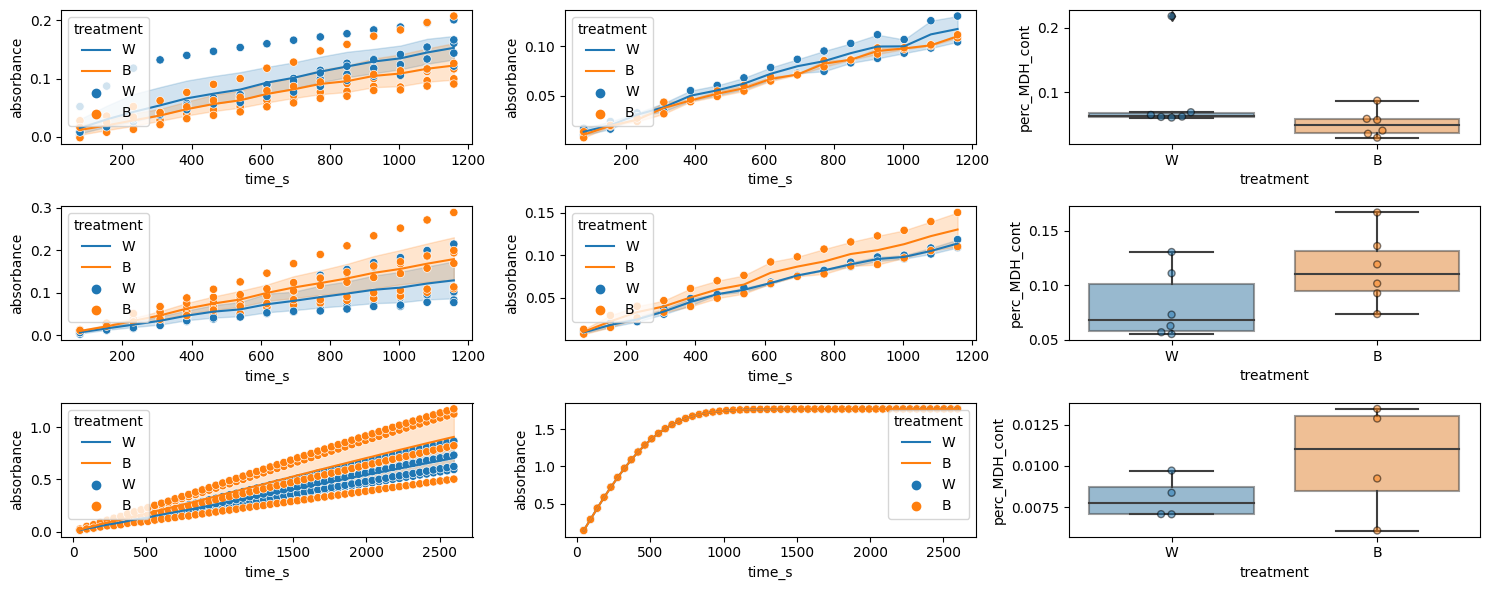

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(15, 6))

sns.lineplot(data=sl_abs_tc[sl_abs_tc.compartment == 'AF'], x='time_s', y='absorbance', hue='treatment', ax=axes[0,0])
sns.scatterplot(data=sl_abs_tc[sl_abs_tc.compartment == 'AF'], x='time_s', y='absorbance', hue='treatment', ax=axes[0,0])

sns.lineplot(data=sl_abs_tc[sl_abs_tc.compartment == 'TE'], x='time_s', y='absorbance', hue='treatment', ax=axes[0,1])
sns.scatterplot(data=sl_abs_tc[sl_abs_tc.compartment == 'TE'], x='time_s', y='absorbance', hue='treatment', ax=axes[0,1])

sns.boxplot(data=sl_5min, y='perc_MDH_cont', x='treatment', boxprops={'alpha':0.5}, ax=axes[0,2])
sns.swarmplot(data=sl_5min, y='perc_MDH_cont', x='treatment', alpha=0.5, edgecolor='black', linewidth=1, ax=axes[0,2])

sns.lineplot(data=speru_abs_tc[speru_abs_tc.compartment == 'AF'], x='time_s', y='absorbance', hue='treatment', ax=axes[1,0])
sns.scatterplot(data=speru_abs_tc[speru_abs_tc.compartment == 'AF'], x='time_s', y='absorbance', hue='treatment', ax=axes[1,0])

sns.lineplot(data=speru_abs_tc[speru_abs_tc.compartment == 'TE'], x='time_s', y='absorbance', hue='treatment', ax=axes[1,1])
sns.scatterplot(data=speru_abs_tc[speru_abs_tc.compartment == 'TE'], x='time_s', y='absorbance', hue='treatment', ax=axes[1,1])

sns.boxplot(data=speru_5min, y='perc_MDH_cont', x='treatment', boxprops={'alpha':0.5}, ax=axes[1,2])
sns.swarmplot(data=speru_5min, y='perc_MDH_cont', x='treatment', alpha=0.5, edgecolor='black', linewidth=1, ax=axes[1,2])


sns.lineplot(data=spen_abs_tc[spen_abs_tc.compartment == 'AF'], x='time_s', y='absorbance', hue='treatment', ax=axes[2,0])
sns.scatterplot(data=spen_abs_tc[spen_abs_tc.compartment == 'AF'], x='time_s', y='absorbance', hue='treatment', ax=axes[2,0])

sns.lineplot(data=spen_abs_tc[spen_abs_tc.compartment == 'TE'], x='time_s', y='absorbance', hue='treatment', ax=axes[2,1])
sns.scatterplot(data=spen_abs_tc[spen_abs_tc.compartment == 'TE'], x='time_s', y='absorbance', hue='treatment', ax=axes[2,1])

sns.boxplot(data=spen_5min, y='perc_MDH_cont', x='treatment', boxprops={'alpha':0.5}, ax=axes[2,2])
sns.swarmplot(data=spen_5min, y='perc_MDH_cont', x='treatment', alpha=0.5, edgecolor='black', linewidth=1, ax=axes[2,2])

plt.tight_layout()
plt.show()

In [17]:
df_mdh = spen_5min.append([sl_5min, speru_5min], ignore_index=True)

In [18]:
sl_M = df_mdh[(df_mdh.species == 'Sl') & (df_mdh.treatment == 'W')].perc_MDH_cont.to_numpy()
sl_B = df_mdh[(df_mdh.species == 'Sl') & (df_mdh.treatment == 'B')].perc_MDH_cont.to_numpy()

speru_M = df_mdh[(df_mdh.species == 'Speru') & (df_mdh.treatment == 'W')].perc_MDH_cont.to_numpy()
speru_B = df_mdh[(df_mdh.species == 'Speru') & (df_mdh.treatment == 'B')].perc_MDH_cont.to_numpy()

spen_M = df_mdh[(df_mdh.species == 'Spen') & (df_mdh.treatment == 'W')].perc_MDH_cont.to_numpy()
spen_B = df_mdh[(df_mdh.species == 'Spen') & (df_mdh.treatment == 'B')].perc_MDH_cont.to_numpy()

sl_t, sl_p = scipy.ttest_ind(sl_B, sl_M)
speru_t, speru_p = scipy.ttest_ind(speru_B, speru_M)
spen_t, spen_p = scipy.ttest_ind(spen_B, spen_M)

print(multi.fdrcorrection([sl_p, speru_p, spen_p]))

print(np.mean(sl_B)/np.mean(sl_M))
print(np.mean(speru_B)/np.mean(speru_M))
print(np.mean(spen_B)/np.mean(spen_M))

(array([False, False, False]), array([0.24582196, 0.24582196, 0.24582196]))
0.5732554134223101
1.4101381526663472
1.2928568885145806


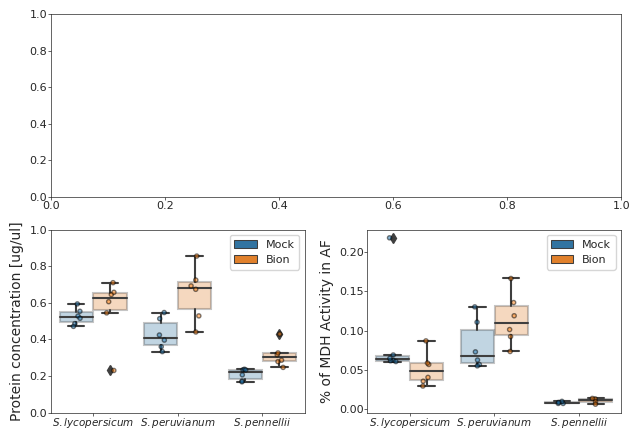

In [30]:
sns.set_style("ticks")

def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=8, pad=0.5)
        # change all spines
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        ax.xaxis.set_tick_params(width=0.5, length=2)
        ax.yaxis.set_tick_params(which='minor', width=0.25, length=2)
        ax.yaxis.set_tick_params(which='major', width=0.5, length=2)


figure = plt.figure(figsize=(6.5, 4.5))

tree = plt.subplot2grid((2, 2), (0, 0), colspan=2)
dc = plt.subplot2grid((2, 2), (1, 0))
mdh = plt.subplot2grid((2, 2), (1, 1))


axes = [tree, dc, mdh]
annotate_axes(axes)

### Define some arrays ###

species_order = ['Sl', 'Speru', 'Spen']
species_labels = ['$\itS.lycopersicum$', '$\itS.peruvianum$', '$\itS.pennellii$']

### Generate individual plots ###

# DC assay

sns.boxplot(data=df, x='sample_name', y='conc', hue='treatment', order=species_order, hue_order=['Mock', 'BTH'], boxprops={'alpha':0.3}, ax=dc)
sns.stripplot(data=df, x='sample_name', y='conc', hue='treatment', order=species_order, hue_order=['Mock', 'BTH'], size=3, dodge=True, alpha=0.5, edgecolor='black', linewidth=1, ax=dc)
dc.set_ylim(0, 1)
dc.set_xlabel('')
dc.set_ylabel('Protein concentration [ug/ul]', fontsize=10)
dc.set_xticklabels(species_labels, fontsize=7.5)

handles, labels = dc.get_legend_handles_labels()
dc.legend(handles[:2], ["Mock", "Bion"], ncol=1, loc=1, prop={"size":8}, markerscale=0.5)


# MDH activity

sns.boxplot(data=df_mdh, x='species', y='perc_MDH_cont', hue='treatment', order=species_order, hue_order=['W', 'B'], boxprops={'alpha':0.3}, ax=mdh)
sns.stripplot(data=df_mdh, x='species', y='perc_MDH_cont', hue='treatment', order=species_order, hue_order=['W', 'B'], size=3, dodge=True, alpha=0.5, edgecolor='black', linewidth=1, ax=mdh)
mdh.set_xlabel('')
mdh.set_ylabel('% of MDH Activity in AF', fontsize=10)
mdh.set_xticklabels(species_labels, fontsize=7.5)

mdh.legend(handles[:2], ["Mock", "Bion"], ncol=1, loc=1, prop={"size":8}, markerscale=0.5)

plt.tight_layout()
#plt.tight_layout(pad=0.75, h_pad=0.001)
plt.savefig('/home/felix/thesis/chapter2_tomato_ISs/Results/1_Immuno_secretomes_of_tomatoes/corrections/Figure1_jupyter.svg', transparent=True)
plt.show()

In [32]:
df_mdh.sort_values(by='perc_MDH_cont')

,species,sample_name,treatment,time_s,absorbance,compartment,dilution,absorbance_per_min,U,U_gFW,U_gFW_per_U_gFWTE,perc_MDH_cont
7,Spen,B4,B,278.2,0.0581,AF,10,0.012531,0.000039,0.000070,0.000061,0.006076
0,Spen,W1,W,278.2,0.0675,AF,10,0.014558,0.000045,0.000082,0.000071,0.007059
2,Spen,W3,W,278.2,0.0676,AF,10,0.014579,0.000045,0.000082,0.000071,0.007069
3,Spen,W4,W,278.2,0.0800,AF,10,0.017254,0.000054,0.000097,0.000084,0.008366
5,Spen,B2,B,278.2,0.0883,AF,10,0.019044,0.000059,0.000107,0.000092,0.009234
1,Spen,W2,W,278.2,0.0929,AF,10,0.020036,0.000062,0.000113,0.000097,0.009715
4,Spen,B1,B,278.2,0.1231,AF,10,0.026549,0.000083,0.000149,0.000129,0.012873
6,Spen,B3,B,278.2,0.1287,AF,10,0.027757,0.000086,0.000156,0.000135,0.013458
16,Sl,B3,B,308.9,0.0209,AF,10,0.004060,0.000013,0.000016,0.000292,0.029246
14,Sl,B1,B,308.9,0.0253,AF,10,0.004914,0.000015,0.000019,0.000354,0.035403
